In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("sim2real_AND.csv")
df_rand = pd.read_csv("sim2real_random.csv")

In [3]:
for frame in [df, df_rand]:
    for index, row in frame.iterrows():
        if row['01'] < row['11'] and row['10'] < row['11'] and row['00'] < row['11']:
            print("AND")
        else:
            print("NOT AND")
    print('---------')

AND
AND
AND
AND
AND
AND
AND
AND
AND
AND
---------
NOT AND
NOT AND
NOT AND
NOT AND
NOT AND
---------


In [4]:
for frame in [df, df_rand]:
    threshold = (np.mean(frame['11']) + max(np.mean(frame['00']),np.mean(frame['01']),np.mean(frame['10'])))/2
    print(threshold)
    for index, row in frame.iterrows():
        if row['01'] < row['11'] and row['11'] > threshold and row['10'] < row['11'] and row['00'] < row['11']:
            print("AND")
        else:
            print("NOT AND")
    print('---------')

5.9648
AND
AND
AND
NOT AND
AND
AND
AND
AND
AND
AND
---------
6.506799999999999
NOT AND
NOT AND
NOT AND
NOT AND
NOT AND
---------


In [5]:
for frame in [df, df_rand]:
    threshold = max(max(frame['00']), max(frame['01']), max(frame['10']))
    mean_andness = []
    for index, row in frame.iterrows():
        mean_andness.append(np.log(row['11']/((row['01'] + row['10']+ row['00'])/3)))
    mean = sum(mean_andness)/len(mean_andness)
    print(mean)
    print('---------')

0.3063145942393752
---------
-0.013335391175495731
---------


In [15]:
config_means = df[['00', '10', '01', '11']].mean()
config_std = df[['00', '10', '01', '11']].std()

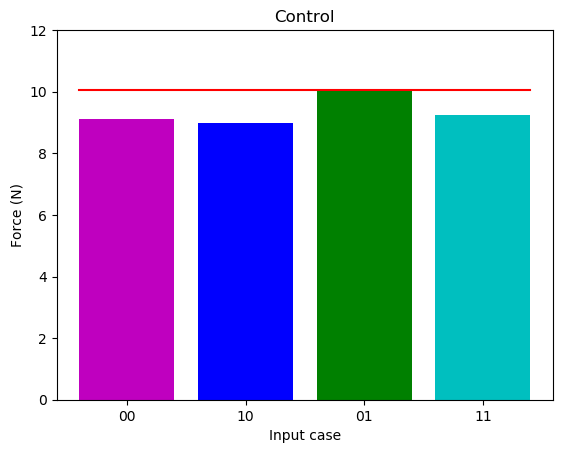

In [21]:
plt.style.use('default')
plt.ylim([0,12])
plt.bar(['00','10','01','11'], df_rand[['00', '10', '01', '11']].iloc[0], yerr=None,capsize=10, color='mbgc')# yerr=config_std, capsize=5, color='skyblue', ax=ax)
plt.xlabel("Input case")
plt.ylabel("Force (N)")
plt.title("Control")
plt.plot([-0.40,1,3.4], [10.058]*3, color='red')
# plt.grid()
plt.show()

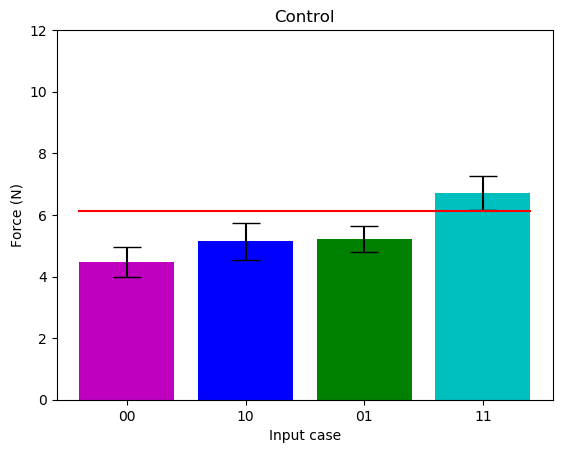

In [24]:
plt.style.use('default')
plt.ylim([0,12])
plt.bar(['00','10','01','11'], config_means, yerr=config_std,capsize=10, color='mbgc')# yerr=config_std, capsize=5, color='skyblue', ax=ax)
plt.xlabel("Input case")
plt.ylabel("Force (N)")
plt.title("Control")
plt.plot([-0.40,1,3.4], [6.121]*3, color='red')
# plt.grid()
plt.show()